In [7]:
from google.colab import files
uploaded = files.upload()


Saving SampleSuperstore.csv to SampleSuperstore.csv


In [15]:
import pandas as pd

df = pd.read_csv('SampleSuperstore.csv')
print("DataFrame columns:", df.columns)

# Drop duplicates
df = df.drop_duplicates()

# Handle missing values
df = df.fillna({
    'Profit': 0,
    'Sales': 0,
    'Quantity': df['Quantity'].median()
})

# Feature engineering (removed operations on 'Order Date' and 'Ship Date')
# df['Year'] = df['Order Date'].dt.year
# df['Month'] = df['Order Date'].dt.month
# df['Month_Name'] = df['Order Date'].dt.month_name()

df['Profit_Margin'] = df['Profit'] / df['Sales']

# Check result
df.head()

DataFrame columns: Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit_Margin
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,0.1600
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,0.3000
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,0.4700
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,-0.4000
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,0.1125


In [12]:
df.to_csv('cleaned_SampleSuperstore.csv', index=False)


In [13]:
files.download('cleaned_SampleSuperstore.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Shape of dataset: (9977, 14)

Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 9977 entries, 0 to 9993
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ship Mode      9977 non-null   object 
 1   Segment        9977 non-null   object 
 2   Country        9977 non-null   object 
 3   City           9977 non-null   object 
 4   State          9977 non-null   object 
 5   Postal Code    9977 non-null   int64  
 6   Region         9977 non-null   object 
 7   Category       9977 non-null   object 
 8   Sub-Category   9977 non-null   object 
 9   Sales          9977 non-null   float64
 10  Quantity       9977 non-null   int64  
 11  Discount       9977 non-null   float64
 12  Profit         9977 non-null   float64
 13  Profit_Margin  9977 non-null   float64
dtypes: float64(4), int64(2), object(8)
memory usage: 1.1+ MB
None

Statistical Summary:
        Postal Code         Sales     Quantity     Discount     

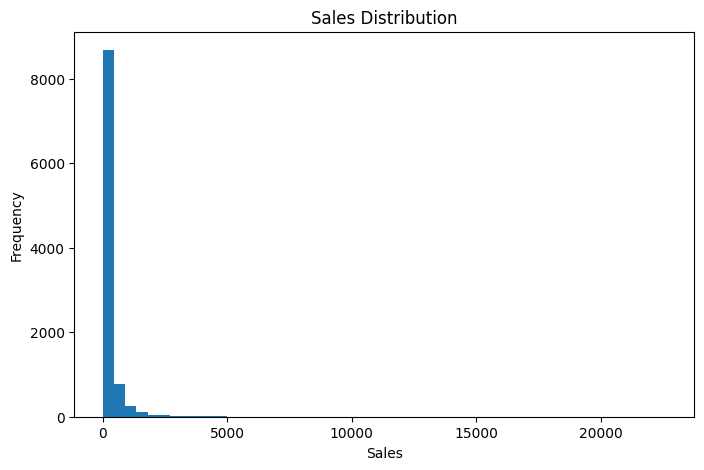

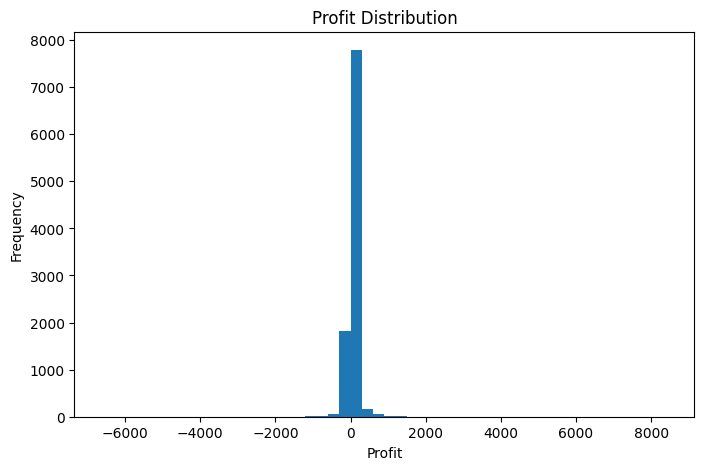


Category-wise Sales & Profit:
          Category        Sales       Profit
0        Furniture  741306.3133   18421.8137
1  Office Supplies  718735.2440  122364.6608
2       Technology  836154.0330  145454.9481


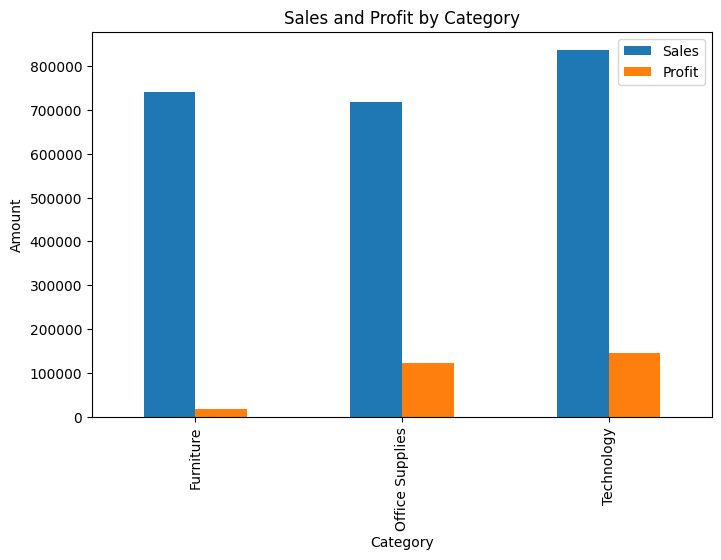


Top 10 Sub-Categories by Sales:
                    Sales      Profit
Sub-Category                         
Phones        330007.0540  44515.7306
Chairs        327777.7610  26567.1278
Storage       223843.6080  21278.8264
Tables        206965.5320 -17725.4811
Binders       203409.1690  30228.0003
Machines      189238.6310   3384.7569
Accessories   167380.3180  41936.6357
Copiers       149528.0300  55617.8249
Bookcases     114879.9963  -3472.5560
Appliances    107532.1610  18138.0054

Region-wise Sales & Profit:
    Region        Sales       Profit
0  Central  500782.8528   39655.8752
1     East  678435.1960   91506.3092
2    South  391721.9050   46749.4303
3     West  725255.6365  108329.8079


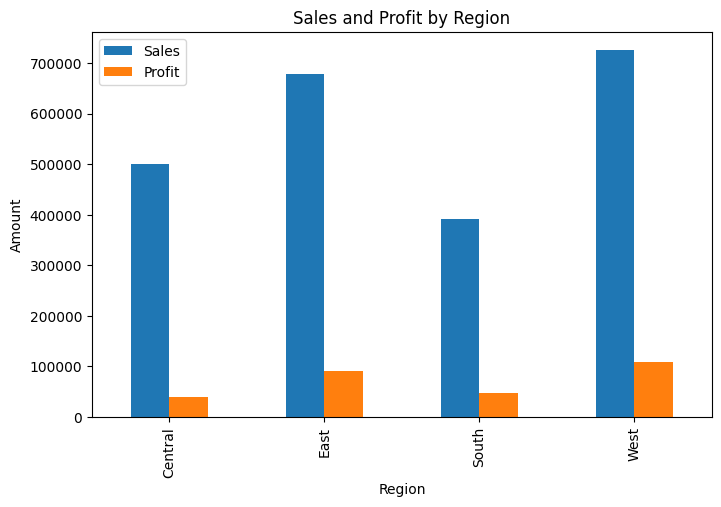


Segment-wise Sales & Profit:
       Segment         Sales       Profit
0     Consumer  1.160833e+06  134007.4413
1    Corporate  7.060701e+05   91954.9798
2  Home Office  4.292927e+05   60279.0015


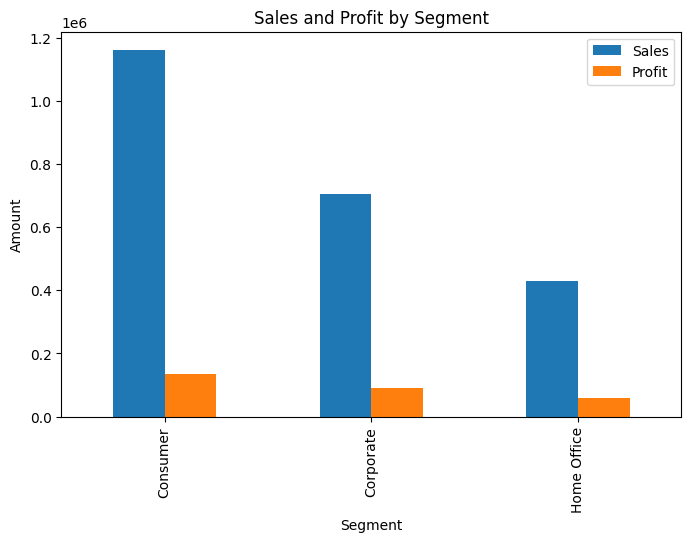

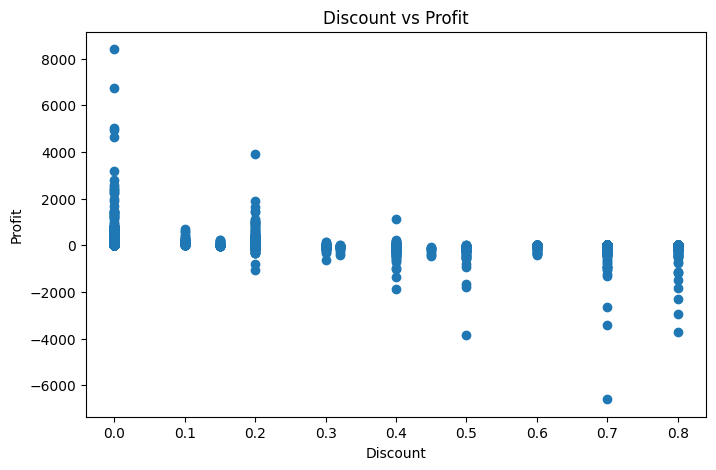


Ship Mode-wise Sales & Profit:
        Ship Mode         Sales       Profit
0     First Class  3.513805e+05   48953.6561
1        Same Day  1.283217e+05   15871.8869
2    Second Class  4.591770e+05   57446.6516
3  Standard Class  1.357316e+06  163969.2280


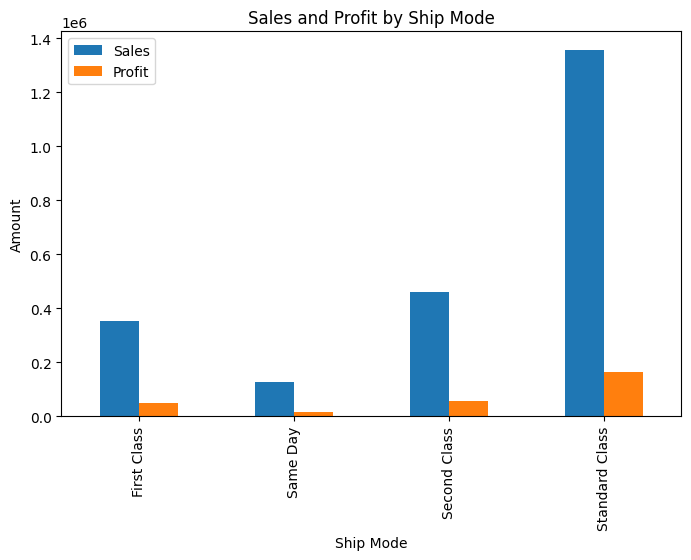


EDA KEY INSIGHTS:
- Sales distribution is right-skewed, indicating few high-value orders
- Some sub-categories generate high sales but incur losses
- Higher discounts often lead to reduced profit
- Regional and segment-level performance varies significantly
- Shipping mode impacts overall profitability


In [16]:
# ===============================
# IMPORT LIBRARIES
# ===============================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ===============================
# LOAD DATA
# ===============================
df = df.copy()   # assuming df is already loaded

# ===============================
# BASIC DATA UNDERSTANDING
# ===============================
print("Shape of dataset:", df.shape)
print("\nData Info:")
print(df.info())

print("\nStatistical Summary:")
print(df.describe())

# ===============================
# MISSING VALUES CHECK
# ===============================
print("\nMissing Values:")
print(df.isnull().sum())

# ===============================
# SALES DISTRIBUTION
# ===============================
plt.figure(figsize=(8,5))
plt.hist(df['Sales'], bins=50)
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

# ===============================
# PROFIT DISTRIBUTION
# ===============================
plt.figure(figsize=(8,5))
plt.hist(df['Profit'], bins=50)
plt.title('Profit Distribution')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.show()

# ===============================
# CATEGORY-WISE SALES & PROFIT
# ===============================
category_analysis = df.groupby('Category')[['Sales','Profit']].sum().reset_index()
print("\nCategory-wise Sales & Profit:")
print(category_analysis)

category_analysis.plot(kind='bar', x='Category', figsize=(8,5))
plt.title('Sales and Profit by Category')
plt.ylabel('Amount')
plt.show()

# ===============================
# SUB-CATEGORY ANALYSIS
# ===============================
sub_category_analysis = (
    df.groupby('Sub-Category')[['Sales','Profit']]
    .sum()
    .sort_values(by='Sales', ascending=False)
)

print("\nTop 10 Sub-Categories by Sales:")
print(sub_category_analysis.head(10))

# ===============================
# REGION-WISE PERFORMANCE
# ===============================
region_analysis = df.groupby('Region')[['Sales','Profit']].sum().reset_index()
print("\nRegion-wise Sales & Profit:")
print(region_analysis)

region_analysis.plot(kind='bar', x='Region', figsize=(8,5))
plt.title('Sales and Profit by Region')
plt.ylabel('Amount')
plt.show()

# ===============================
# SEGMENT-WISE PERFORMANCE
# ===============================
segment_analysis = df.groupby('Segment')[['Sales','Profit']].sum().reset_index()
print("\nSegment-wise Sales & Profit:")
print(segment_analysis)

segment_analysis.plot(kind='bar', x='Segment', figsize=(8,5))
plt.title('Sales and Profit by Segment')
plt.ylabel('Amount')
plt.show()

# ===============================
# DISCOUNT VS PROFIT
# ===============================
plt.figure(figsize=(8,5))
plt.scatter(df['Discount'], df['Profit'])
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.title('Discount vs Profit')
plt.show()

# ===============================
# SHIP MODE ANALYSIS
# ===============================
ship_mode_analysis = df.groupby('Ship Mode')[['Sales','Profit']].sum().reset_index()
print("\nShip Mode-wise Sales & Profit:")
print(ship_mode_analysis)

ship_mode_analysis.plot(kind='bar', x='Ship Mode', figsize=(8,5))
plt.title('Sales and Profit by Ship Mode')
plt.ylabel('Amount')
plt.show()

# ===============================
# FINAL EDA INSIGHTS (TEXT OUTPUT)
# ===============================
print("\nEDA KEY INSIGHTS:")
print("- Sales distribution is right-skewed, indicating few high-value orders")
print("- Some sub-categories generate high sales but incur losses")
print("- Higher discounts often lead to reduced profit")
print("- Regional and segment-level performance varies significantly")
print("- Shipping mode impacts overall profitability")
